In [1]:
#Necessary libraries to import
import tensorflow as tf 
# tensorflow is a open source free library used for the neural network
from tensorflow import keras# user free neural network library used for neural network.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # for visualisation purpose
import random
%matplotlib inline

In [2]:
'''Loading and Preparing the Data
MNIST stands for Modified National Institute of Standard and technology dataset.It basicaally contains 70000 handwritten images
Each Image is of 28*28 pixels.
ie. about 784 features Each feature represents only 1 pixel intensity ie. from 0 to 255.
This dataset further divided into the 60000 trained images and 10000 testing images.'''
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


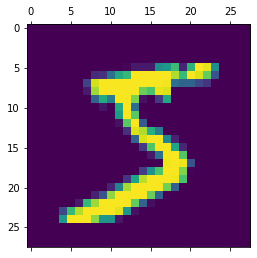

In [3]:
plt.matshow(x_train[0]) # is basically used for to see how first image looks.

In [4]:
# Normalizing the images by scaling the pixels intensities to the range 0 and 1.
x_train=x_train/255
x_test=x_test/255

In [5]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [6]:
'''The ReLu function is one of the most popular activation function.
It stands for Rectified Linear Unit .Mathematically this functionis defined as y=max(0,x).
The ReLu function returns 0 if the input is negative and linear if the input is positive.
The Softmax function is another Activation Function.It changes input values that reach from 0 and 1.'''
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
# sequential allows us to build the model layer by layer.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
#compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
#Train the model
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6532 - accuracy: 0.8366 - val_loss: 0.3571 - val_accuracy: 0.9024
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3358 - accuracy: 0.9061 - val_loss: 0.2895 - val_accuracy: 0.9203
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2856 - accuracy: 0.9194 - val_loss: 0.2585 - val_accuracy: 0.9292
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2543 - accuracy: 0.9283 - val_loss: 0.2334 - val_accuracy: 0.9350
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2308 - accuracy: 0.9355 - val_loss: 0.2151 - val_accuracy: 0.9397
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2122 - accuracy: 0.9408 - val_loss: 0.2019 - val_accuracy: 0.9422
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1967 - accuracy: 0.9452 - val_loss: 0.1875 - val_accuracy:

In [10]:
#evaluate the model
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1607 - accuracy: 0.9546
Loss=0.161
Accuracy=0.955


<function matplotlib.pyplot.show(close=None, block=None)>

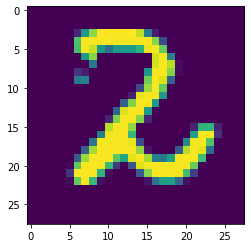

In [11]:
#Making Prediction on New Data
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [12]:
#confusion matrix
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict,axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print('confusion matrix of the test set :\n', confusion_matrix)

313/313 [==============================] - 1s 2ms/step
confusion matrix of the test set :
 tf.Tensor(
[[ 963    0    1    4    0    3    5    1    2    1]
 [   0 1123    3    2    0    1    3    1    2    0]
 [   8    4  975   11    6    2    4    9   11    2]
 [   1    1    6  975    0    7    0    8   10    2]
 [   1    2    6    0  945    0    9    2    3   14]
 [  10    2    1   20    3  827   10    1   13    5]
 [  10    3    1    3    8    9  920    1    3    0]
 [   1   10   19    8    2    1    0  969    1   17]
 [   4    3    5   15    7    5    9    7  916    3]
 [   8    9    1   13   30    4    1    6    4  933]], shape=(10, 10), dtype=int32)


With above code we can see that, throughout the epochs, our model accuracy increases and
loss decreases that is good since our model gains confidence with our prediction
This indicates the model is trained in a good way
1. The two loss(loss and val_loss) are decreasing and the accuracy (accuracy and
val_accuracy) increasing.
2. The val_accuracy is the measure of how good the model is predicting so, it is observed
that the model is well trained after 10 epochs